In [1]:
#Importing Libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
# Visualizing 6 decimals per value
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Reading data from csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

sensorama = load_dataset('sensorama_df.csv')

In [3]:
# Since odor name and canonical_smiles variables are strings, we change them to a numerical value
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['odor name'])
sensorama['odor name']=label_encoder.transform(sensorama['odor name'])
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['canonical_smiles'])
sensorama['canonical_smiles']= label_encoder.transform(sensorama['canonical_smiles'])

In [4]:
# Normalizing function
def standarize(x_train):
    mean = x_train.mean()
    std = x_train.std()
    x_train -= mean
    x_train /= std

# Normalizing data
s= sensorama.columns
s=s.drop(['odor level', 'cid', 'canonical_smiles', 'odor name'])
for c in s:
    standarize(sensorama[c])
# After normalizing the data, we have NaNs values, so we change them to 0
sensorama=sensorama.fillna(0)

### ODOR LEVEL 1

In [5]:
X = sensorama[['odor name','xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 1

Accuracy:  64.05867970660147 %


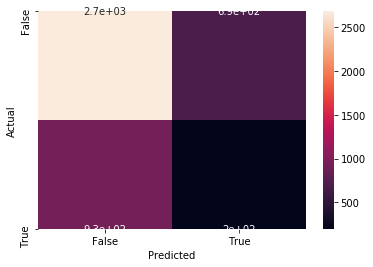

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.459569
208   0.010336
207   0.010250
149   0.010121
151   0.009990
        ...   
108   0.000000
109   0.000000
110   0.000000
111   0.000000
107   0.000000
Length: 211, dtype: float64


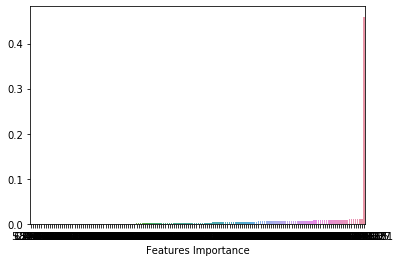

In [7]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [8]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [9]:
X = sensorama[['odor name', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
               'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 
               'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 1

Accuracy:  64.39208713047344 %


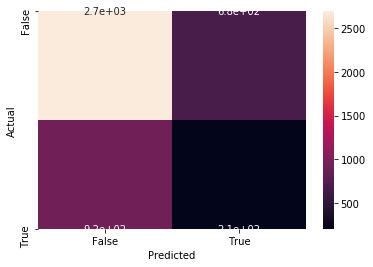

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

### ODOR LEVEL 2

In [11]:
X = sensorama[['odor name', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 2

Accuracy:  66.83707490553456 %


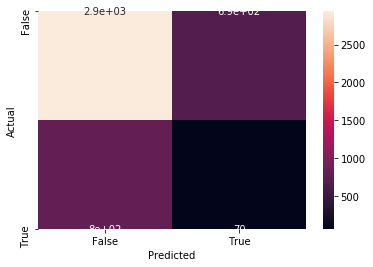

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.534661
149   0.009084
151   0.008931
208   0.008931
193   0.008771
        ...   
123   0.000000
124   0.000000
125   0.000000
53    0.000000
95    0.000000
Length: 211, dtype: float64


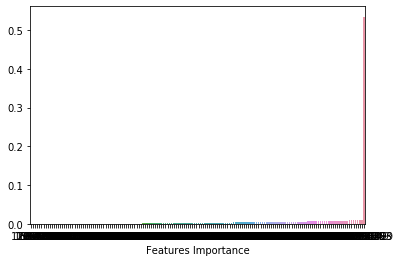

In [13]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [14]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [15]:
X = sensorama[['odor name', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
               'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf',
               'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 2

Accuracy:  67.48166259168704 %


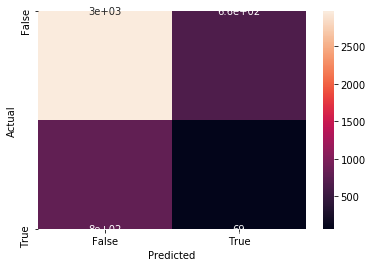

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

### ODOR LEVEL 3

In [17]:
X = sensorama[['odor name', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 3

Accuracy:  71.17137141587018 %


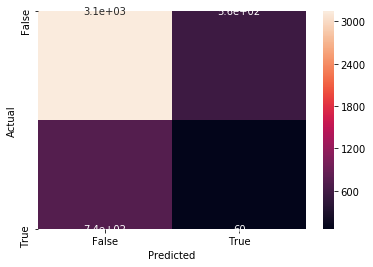

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.553085
150   0.008894
208   0.008642
151   0.008469
207   0.008467
        ...   
107   0.000000
89    0.000000
109   0.000000
110   0.000000
108   0.000000
Length: 211, dtype: float64


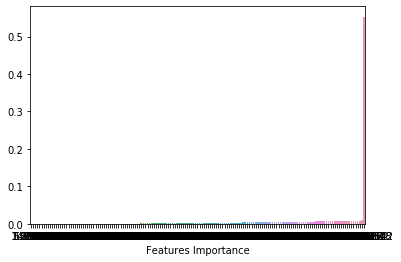

In [19]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [20]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [21]:
X = sensorama[['odor name', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12','mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
               'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso',
               'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.ddsss',
               'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5','arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 3

Accuracy:  70.971326961547 %


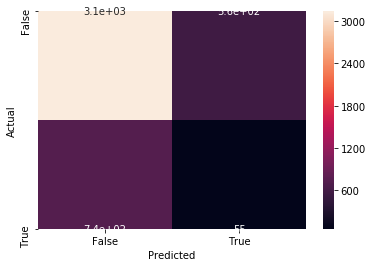

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

### ODOR LEVEL 4

In [23]:
X = sensorama[['odor name', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 4

Accuracy:  77.7950655701267 %


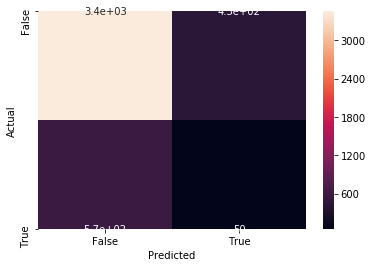

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.569195
150   0.008984
149   0.008527
196   0.008512
208   0.008450
        ...   
111   0.000000
112   0.000000
113   0.000000
114   0.000000
105   0.000000
Length: 211, dtype: float64


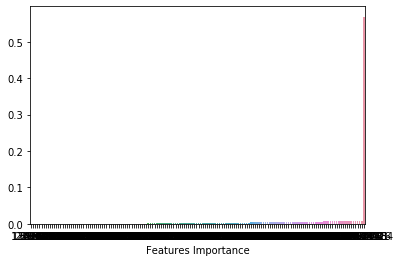

In [25]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [26]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [27]:
X = sensorama[['odor name', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11','mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
               'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 
                'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 4

Accuracy:  78.0395643476328 %


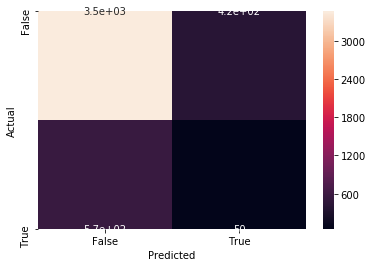

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

### ODOR LEVEL 5

In [29]:
X = sensorama[['odor name',  'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 5

Accuracy:  82.90731273616359 %


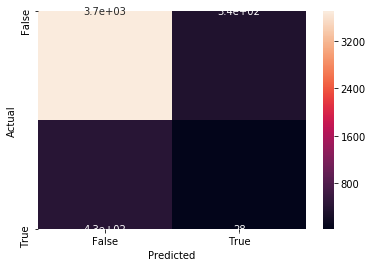

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.599515
150   0.008095
151   0.007888
195   0.007713
207   0.007710
        ...   
120   0.000000
121   0.000000
122   0.000000
123   0.000000
94    0.000000
Length: 211, dtype: float64


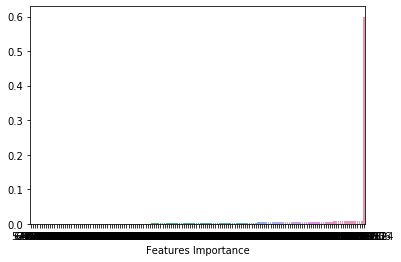

In [31]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [32]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [33]:
X = sensorama[['odor name','xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
               'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 
               'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss',
               'khs.scl', 'khs.sbr',  'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 5

Accuracy:  83.61858190709046 %


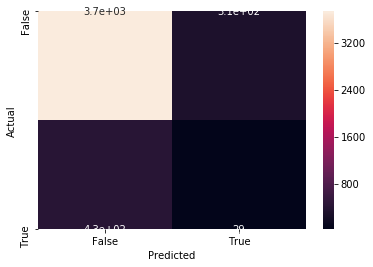

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

### ODOR LEVEL 6

In [35]:
X = sensorama[['odor name', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 6

Accuracy:  88.21960435652367 %


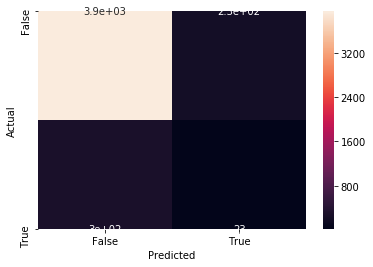

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.630793
151   0.008149
150   0.007995
208   0.007702
149   0.007474
        ...   
117   0.000000
118   0.000000
119   0.000000
120   0.000000
44    0.000000
Length: 211, dtype: float64


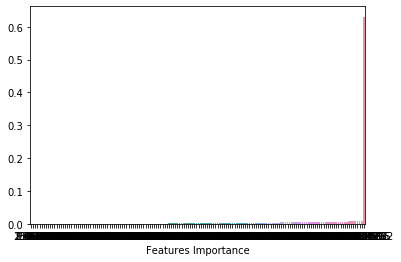

In [37]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [38]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [39]:
X = sensorama[['odor name','xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
               'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf',
               'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.sbr', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 6

Accuracy:  88.1973771949322 %


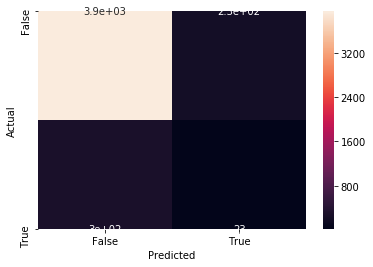

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

### ODOR LEVEL 7

In [41]:
X = sensorama[['odor name',  'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 7

Accuracy:  92.42053789731052 %


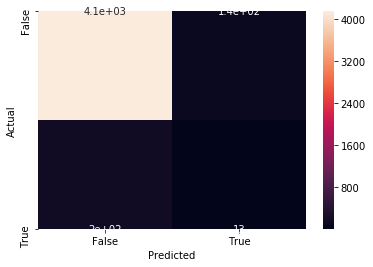

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.656938
193   0.007315
208   0.007123
207   0.007041
150   0.006945
        ...   
108   0.000000
109   0.000000
110   0.000000
111   0.000000
45    0.000000
Length: 211, dtype: float64


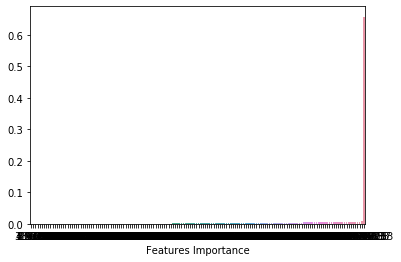

In [43]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [44]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [45]:
X = sensorama[['odor name', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14',
               'mdec.33', 'mdec.34', 'mdeo.11', 'mdeo.12', 'mdeo.22', 
               'mlogp', 'atom p', 'atom lc', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.aach',
               'khs.tsc', 'khs.dssc', 'khs.aasc','khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn','khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 
               'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 7

Accuracy:  92.68726383640809 %


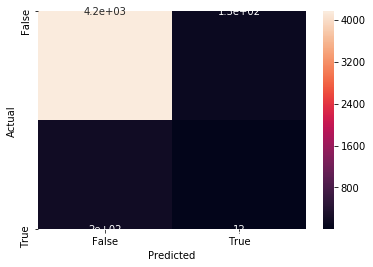

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

### ODOR LEVEL 8

In [47]:
X = sensorama[['odor name',  'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 8

Accuracy:  96.06579239831073 %


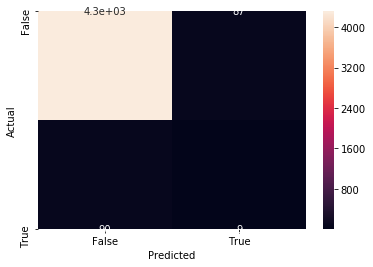

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances

0     0.667757
207   0.007161
150   0.007134
208   0.006698
151   0.006645
        ...   
53    0.000000
54    0.000000
55    0.000000
56    0.000000
105   0.000000
Length: 211, dtype: float64


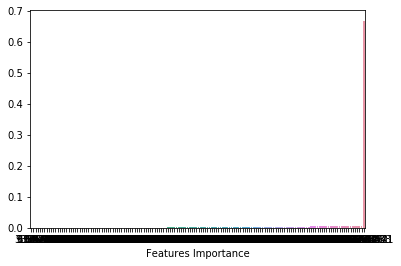

In [49]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [123]:
features = []
for i in range(0,len(featureImportances)):
    if featureImportances[i] == 0:
        features.append(i)

In [50]:
X = sensorama[['odor name', 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22','mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc', 
                'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.ssnh',
               'khs.tn', 'khs.sssnh', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 
               'khs.scl', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama['odor level']  == 8

Accuracy:  96.11024672149367 %


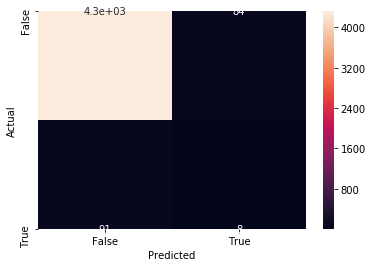

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()